In [21]:
from typing import TypedDict , List
from langgraph.graph import StateGraph
from math import prod

In [22]:
class MahAgent(TypedDict):
    values: list[int]
    name: str
    operation : str
    result: str

In [23]:
def calc_node(state: MahAgent) -> MahAgent:
    """ this is used for mathematical calculation"""
    if state['operation'] == "+":
        state['result'] = f"Hi {state['name']}, your answer is: {sum(state['values'])}"
    if state['operation'] == "*":
        state['result'] = f"Hi {state['name']}, your answer is: {prod(state['values'])}"
    return state

In [24]:
graph_builder = StateGraph(MahAgent)

In [25]:
graph_builder.add_node("calculation_node", calc_node)
graph_builder.set_entry_point("calculation_node")
graph_builder.set_finish_point("calculation_node")

graph = graph_builder.compile()

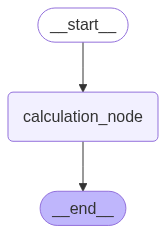

In [26]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [27]:
# response1 = graph.invoke({"values": [1,2,3,4,5,6,7,8,9,10], "name": "Garvit", "operation" : "+"})
response2 = graph.invoke({"values": [1,2,3,4,5,6,7,8,9,10], "name": "Garvit", "operation" : "*"})
# response1["result"]
response2["result"]

'Hi Garvit, your answer is: 3628800'